In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Seminar 1: Predicting Wi-Fi Network Performance with Linear Regression

This notebook follows the instructions from **AAX_Seminar1** to:
- Load and process the Wi-Fi network simulation dataset.
- Explore and visualize the data.
- Train and evaluate a Linear Regression model to predict the network **Throughput**.

In [27]:
# Load data and adding columns
df = pd.read_csv("dataset_Seminar1.txt", sep='\s+', header=None)
df.columns = [
    'Number_of_STAs', 'Load_Mbps', 'Size_x', 'Size_y', 'Area',
    'Contention_Window', 'Channel_Width_MHz', 'Packet_Size_bits',
    'Max_RSSI_dBm', 'Avg_RSSI_dBm', 'Min_RSSI_dBm',
    'Avg_Prob_Failure', 'Throughput_bps', 'Avg_Delay_s',
    'Total_Airtime', 'Proportional_Airtime'
]

# Display first rows
display(df.head())

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\jordi\AppData\Local\Temp\ipykernel_30536\2641793720.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("dataset_Seminar1.txt", sep='\s+', header=None)


,Number_of_STAs,Load_Mbps,Size_x,Size_y,Area,Contention_Window,Channel_Width_MHz,Packet_Size_bits,Max_RSSI_dBm,Avg_RSSI_dBm,Min_RSSI_dBm,Avg_Prob_Failure,Throughput_bps,Avg_Delay_s,Total_Airtime,Proportional_Airtime
0,40.0,60000000.0,22.0,39.0,858.0,63.0,80.0,4000.0,-42.928330,-63.163012,-74.965338,0.415189,7.208644e+06,1.229466e+07,1.084041,0.875490
1,35.0,52500000.0,20.0,33.0,660.0,31.0,40.0,10000.0,-47.815800,-63.298410,-72.847989,0.485311,1.545116e+07,1.275042e+07,1.111263,0.873785
2,16.0,12000000.0,34.0,14.0,476.0,255.0,40.0,4000.0,-46.138494,-60.076333,-70.044800,0.099413,6.743660e+06,2.251690e+06,0.880036,0.849701
3,37.0,18500000.0,35.0,7.0,245.0,31.0,80.0,10000.0,-42.708813,-60.141393,-72.029643,0.493704,1.675025e+07,1.211374e+07,1.126341,0.860103
4,18.0,4500000.0,36.0,35.0,1260.0,127.0,160.0,8000.0,-45.492991,-63.780783,-76.225550,0.011664,4.500000e+06,1.446000e-03,0.276770,0.275687


## Data Overview
We display a sample of the data and descriptive statistics (mean, standard deviation).

In [28]:
# Displaying statistics about each feature (mean, standard deviation).
feature_stats = df.describe().loc[['mean', 'std']]
print("Feature Statistics (Mean and Standard Deviation):")
display(feature_stats.T)

Feature Statistics (Mean and Standard Deviation):


,mean,std
Number_of_STAs,2.144617e+01,1.155437e+01
Load_Mbps,2.140292e+07,1.852042e+07
Size_x,2.056294e+01,1.154521e+01
Size_y,2.047964e+01,1.154063e+01
Area,4.212704e+02,3.603443e+02
Contention_Window,2.270439e+02,3.233509e+02
Channel_Width_MHz,7.510600e+01,5.370428e+01
Packet_Size_bits,7.997580e+03,2.825533e+03
Max_RSSI_dBm,-4.591117e+01,5.400265e+00
Avg_RSSI_dBm,-5.757743e+01,6.108548e+00


## Feature Distributions
Visualizing how selected features are distributed.

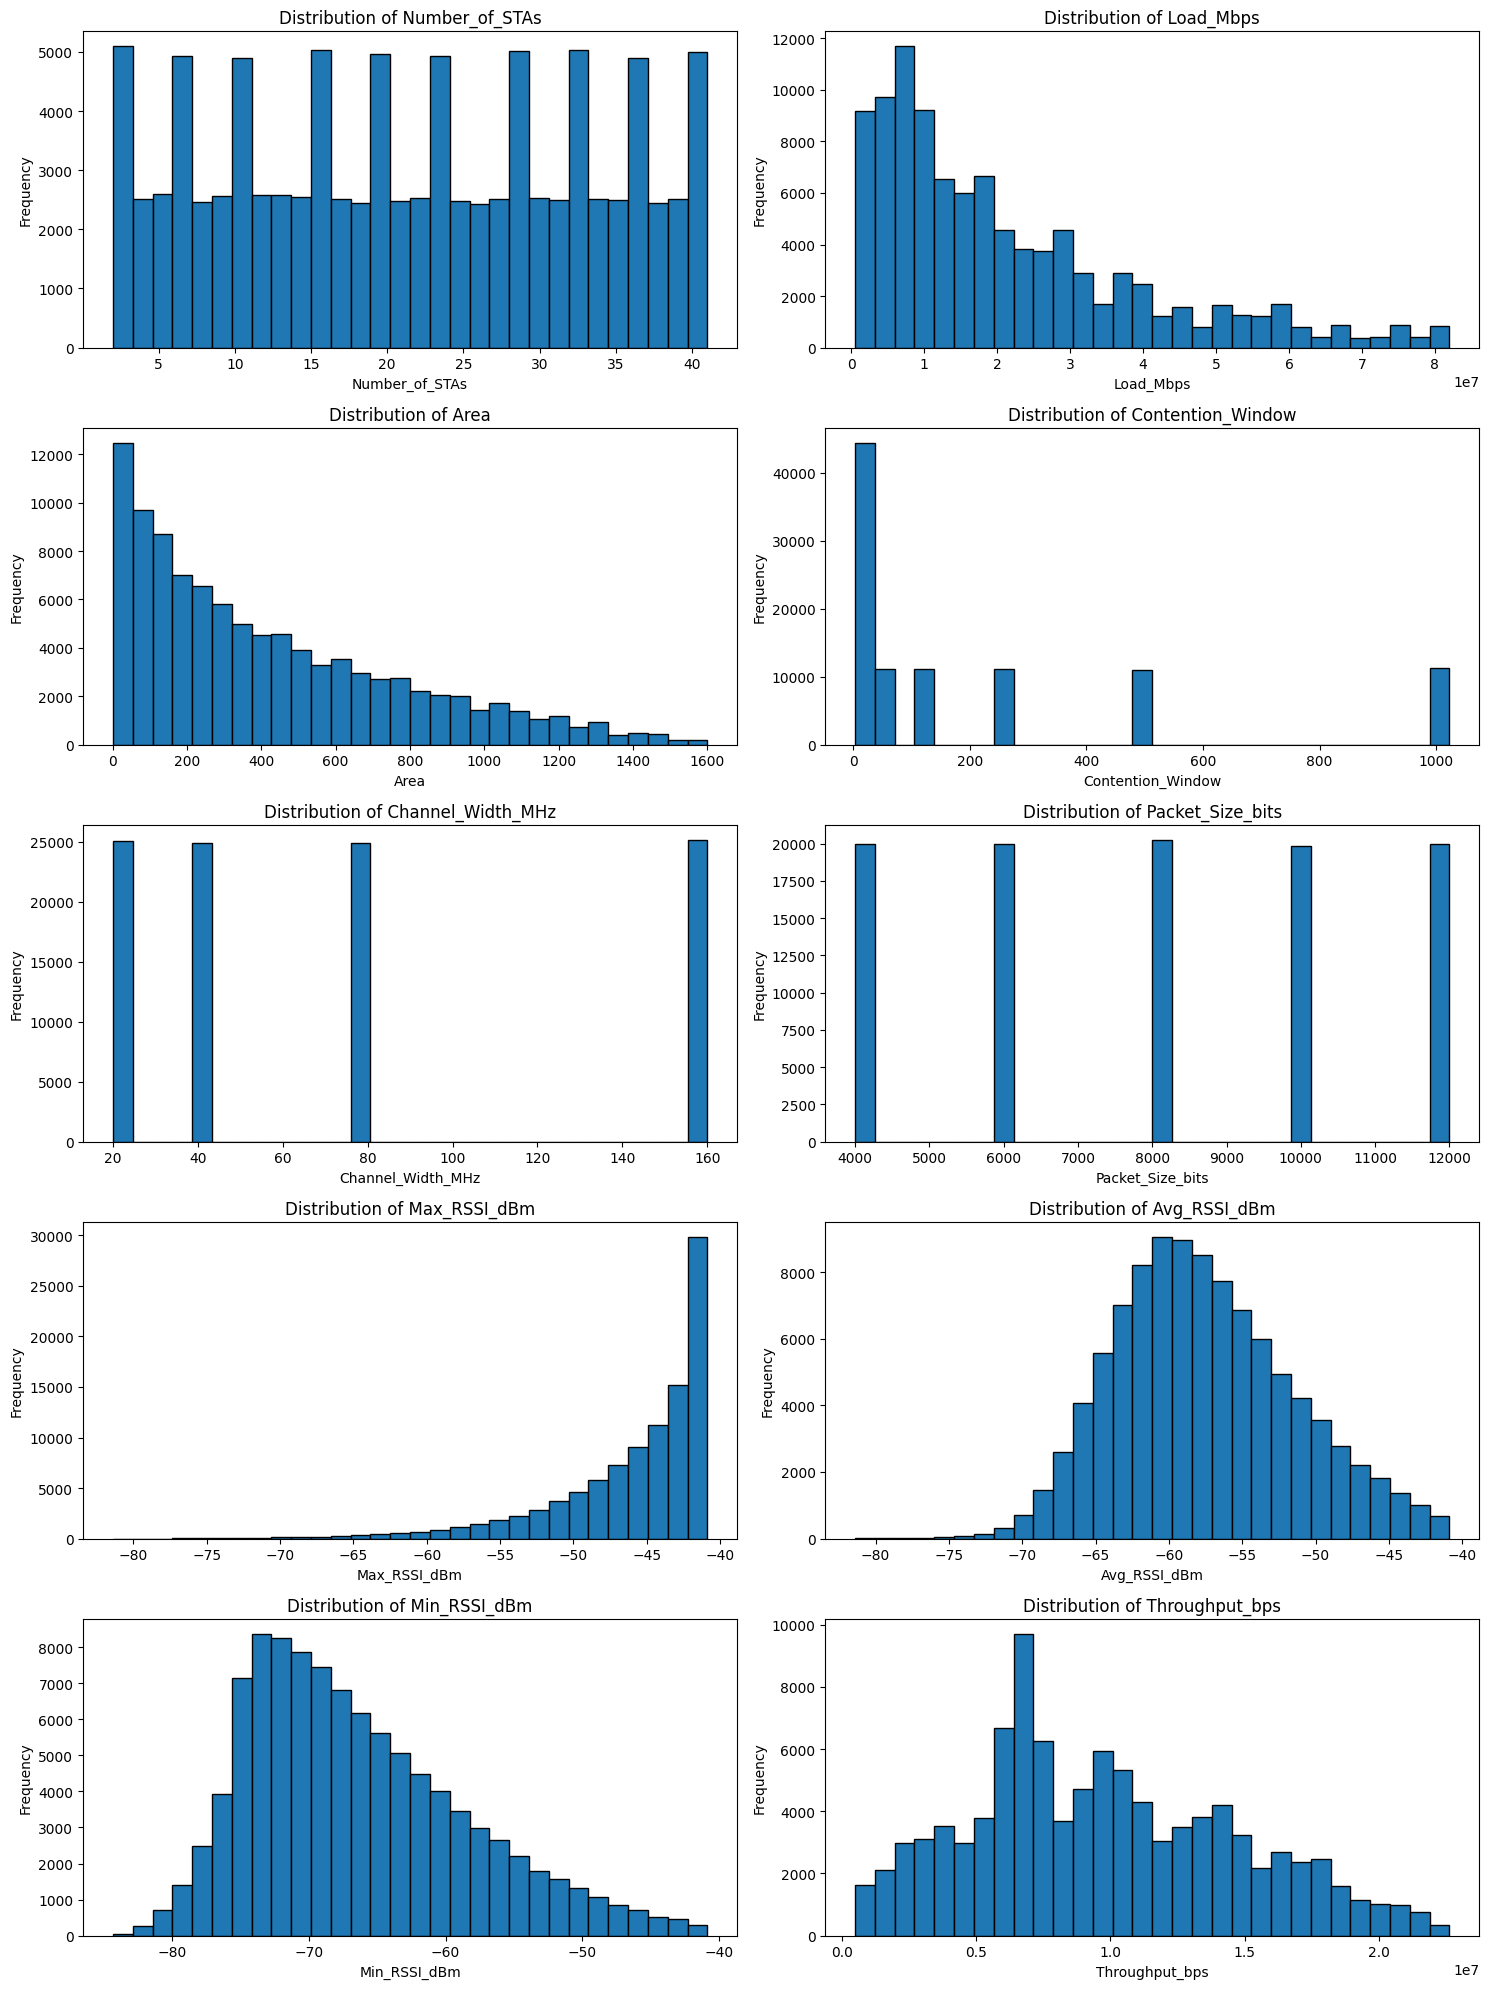

In [29]:
# Features and target variables to plot
columns_to_plot = [
    'Number_of_STAs', 'Load_Mbps', 'Area', 'Contention_Window', 
    'Channel_Width_MHz', 'Packet_Size_bits', 'Max_RSSI_dBm', 
    'Avg_RSSI_dBm', 'Min_RSSI_dBm', 'Throughput_bps'
]


# Plot histograms for each feature
plt.figure(figsize=(15, 20))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(5, 2, i)
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Data Preprocessing
- Dropping missing values (if any).
- Selecting input features (`X`) and target (`y`).
- Splitting into training and test sets.
- Standardizing features.

In [30]:
# Handle missing values (if any)
df = df.dropna()  

# Select features and target
features = [
    'Number_of_STAs', 'Load_Mbps', 'Area', 'Contention_Window', 
    'Channel_Width_MHz', 'Packet_Size_bits', 'Max_RSSI_dBm', 
    'Avg_RSSI_dBm', 'Min_RSSI_dBm'
]
target = 'Throughput_bps' # Target variable: focus on throughput

X = df[features].values
y = df[target].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)

X_train_scaled shape: (80000, 9)
y_train shape: (80000,)


## Model Training
Fitting a Linear Regression model using the standardized training data.

In [31]:
# Model Training
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

## Model Evaluation
Evaluate the model using:
- Mean Squared Error (MSE)
- R² Score

Also visualize the true vs predicted Throughput.

In [32]:
# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Mean Squared Error (MSE): {train_mse:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.2f}")

print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

Training Mean Squared Error (MSE): 10037011034691.47
Test Mean Squared Error (MSE): 10155778653991.86
Training R² Score: 0.5913
Test R² Score: 0.5884


Linear regression is able to model some of the relationship between the input features and throughput and explain about 59% of the variance in throughput. But the relationship is likely not purely linear or there are other factors not captured by your features.

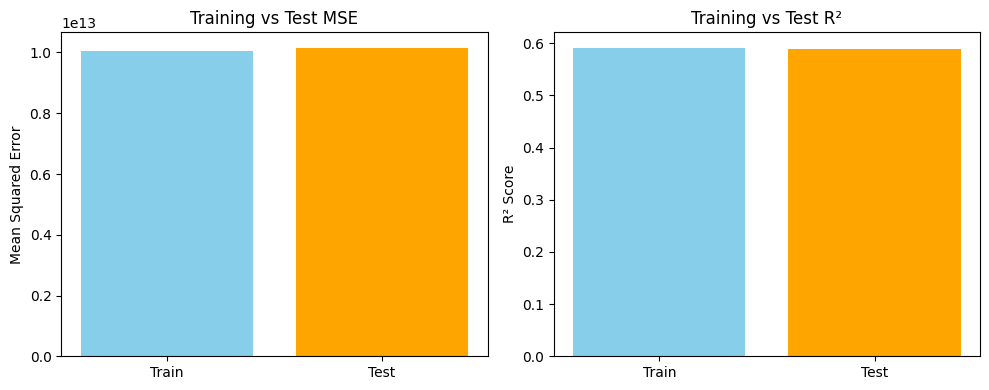

In [35]:
# Plot training and test MSE as bar chart
mse_scores = [train_mse, test_mse]
r2_scores = [train_r2, test_r2]

plt.figure(figsize=(10, 4))

# MSE plot
plt.subplot(1, 2, 1)
plt.bar(['Train', 'Test'], mse_scores, color=['skyblue', 'orange'])
plt.ylabel('Mean Squared Error')
plt.title('Training vs Test MSE')

# R2 plot
plt.subplot(1, 2, 2)
plt.bar(['Train', 'Test'], r2_scores, color=['skyblue', 'orange'])
plt.ylabel('R² Score')
plt.title('Training vs Test R²')

plt.tight_layout()
plt.show()

The close values for both metrics suggest the model generalizes well and is not memorizing the training data.

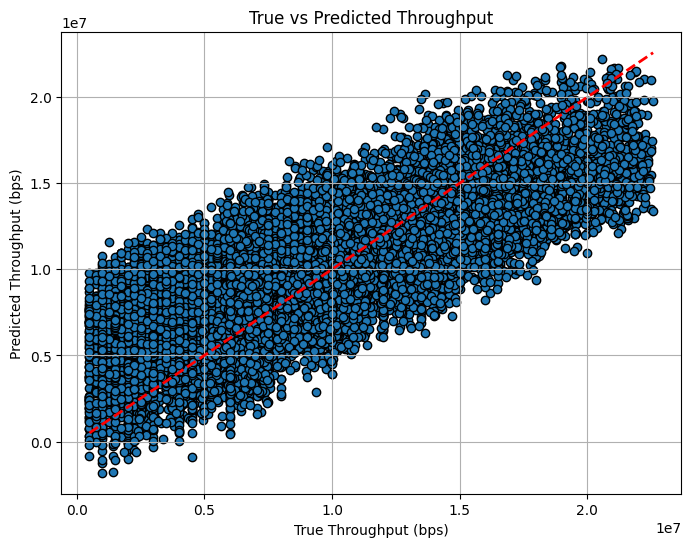

In [36]:
# Plot True vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Throughput (bps)')
plt.ylabel('Predicted Throughput (bps)')
plt.title('True vs Predicted Throughput')
plt.grid()
plt.show()

The plot shows the true throughput values on the x-axis and the predicted throughput values on the y-axis for the test set; the red dashed line represents perfect predictions, so points close to this line indicate accurate predictions by the model.

The points are clustered along the red line, indicating the model captures the general relationship between features and throughput. There is a noticeable spread around the line, especially at higher throughput values. This means the model's predictions are not perfect and there is some error.   The model explains a significant portion of the variance (as seen in R² score), but not all.